In [128]:
import numpy as np

# configure formatting
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)})

def sign(x):
    if x >= 0:
        return 1
    else:
        return -1

def householder(w):
    v = np.zeros_like(w)

    v[0] = w[0] + sign(w[0]) * np.linalg.norm(w)
    v[1:] = w[1:]
    
    H = np.eye(len(w)) - 2 * np.outer(v, v) / np.dot(v, v)
    
    return H


def qrDecomposition(A):
    (rows, columns) = A.shape
    
    Q = np.identity(rows)
    R = np.copy(A)

    for column in range(columns):
        # get needed vector and apply householder transformation
        y = R[column:, column]
        Hk = householder(y)

        # fill up into correct matrix dimension
        Qk = np.identity(rows)
        Qk[column:,column:] = Hk

        # apply to matrices
        Q = Qk@Q
        R = Qk@R

    # cut into needed shapes
    R = R[0:columns,:] 
    Q = Q.T[:,0:columns]

    return Q, R

# Ax = b, solves for x
def linsolveQR(A, b):
    Q, R = qrDecomposition(A)

    # backward substitution
    # solve Rx = Q.T * b
    (rows, columns) = R.shape

    z = Q.T@b
    x = np.full(rows, 0, dtype=np.number)
    for row in reversed(range(rows)):
        sub = np.dot(R[row], x)
        x[row] = (z[row] - sub)/R[row, row]

    return x

In [129]:
# example testcase
A = np.array([  [-1,  7, -8, -9,  6],
                [-6, -8,  0,  3,  8],
                [-4, -2,  8,  0, -2],
                [-1, -9,  4, -8,  2],
                [-3, -5, -5,  7, -4],
                [-7, -4,  7, -1,  5],
                [-9, -7,  6, -5, -8],
                [-4, -3, -5,  3, -6],
                [ 5,  7,  5, -4, -5],
                [ 4, -6, -8, -2, -5]],dtype=float)

Q1, R1 = qrDecomposition(A)
Q2, R2 = np.linalg.qr(A)

# check equality and function of matrices
assert(np.sum(Q1-Q2) < 1e-8)
assert(np.sum(R1-R2) < 1e-8)
assert(np.sum(A-Q1@R1) < 1e-8)


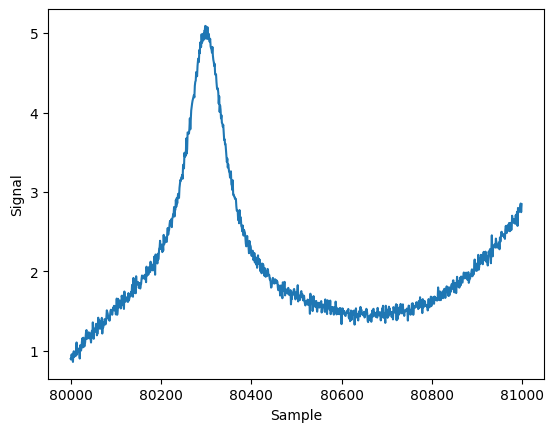

In [130]:
import matplotlib.pyplot as plt

data = np.loadtxt('data.txt')

x = data[:,0]
ym = data[:,1]

# visualize data
plt.plot(x, ym)
plt.ylabel("Signal")
plt.xlabel("Sample")
plt.show()


(-6444270.548843019, 240.26125309537838, -0.002985865753163016, 1.2368968609413603e-08, 3.3423237887057864)


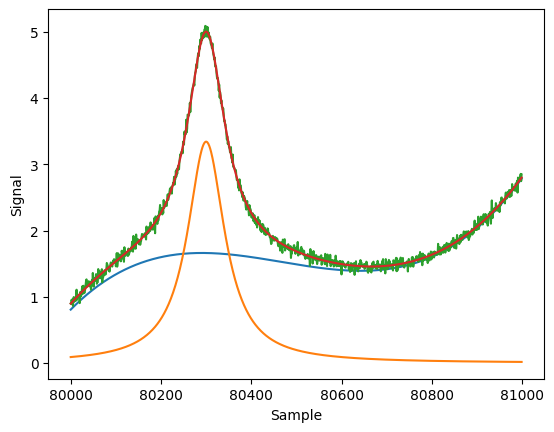

In [132]:
def lorentzShape(x, a, s0, x0):
    x = (x - x0) / (s0/2)
    return a * 1/(1+x**2)

def poly3(x, a, b, c, d):
    return a + b*(x**1) + c*(x**2) + d*(x**3)


# fit polynomial to data
s0 = 100
x0 = 80.3 * 10**3

A = np.vstack((np.ones_like(x), x**1, (x**2), (x**3), lorentzShape(x, 1, s0, x0))).T
(a, b, c, d, e) = linsolveQR(A, ym)

print((a, b, c, d, e))

yp = poly3(x, a, b, c, d)
yl = lorentzShape(x, e, s0, x0)

plt.plot(x, yp)
plt.plot(x, yl)
plt.plot(x, ym)
plt.plot(x, yp+yl)

plt.ylabel("Signal")
plt.xlabel("Sample")
plt.show()
